In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as spa
import scipy.sparse.linalg as spalin
from tqdm import trange
import matplotlib.colors as mcolors
from matplotlib.ticker import MaxNLocator
import os
import sys
sys.path.append("../dyn/")
sys.path.append("../")
sys.path.append("../phase/")
sys.path.append("../artfigs/")
from spatial_ultis import *
from dyn_ultis import *
from phase_params import *
from dyn_params import *
from artfigs_ulits import *

In [ ]:
T, t_step, record_step = 100, 100, 10
t_step_onset = 400
file_name_list = ['2dglobal','2dosc','2dbump','2dwave','2dchaos','2dwave']
generate_params_list = [generate_params_dyn_global_new, generate_params_dyn_osc_new, generate_params_dyn_bump_new, generate_params_dyn_wave_new, generate_params_dyn_chaos_new, generate_params_dyn_wave_new]
trial_params_list = [3,3,3,3,3,0]
p_simul = Simul_Params(T = T, t_step=t_step, record_step=record_step, activation_func=['tanh','linear'])

record_x = np.load(r"../../data/artfigs_dynrec_"+file_name_list[0]+'_'+str(0)+r'.npy')

In [ ]:
activated_x = np.tanh(record_x)                   
sp_activated_x = np.abs(np.fft.fft(activated_x[t_step_onset::,:], axis=0))
freq_sp = np.fft.fftfreq(np.shape(activated_x[t_step_onset::,:])[0], 1/(p_simul.t_step/p_simul.record_step))
sp_mean = np.mean(sp_activated_x, axis=1)

In [ ]:
activated_x = np.tanh(record_x)                   
sp_activated_x = np.abs(np.fft.fft(activated_x[t_step_onset::,:], axis=0))
freq_sp = np.fft.fftfreq(np.shape(activated_x[t_step_onset::,:])[0], 1/(p_simul.t_step/p_simul.record_step))
sp_mean = np.mean(sp_activated_x, axis=1)

<BarContainer object of 4 artists>

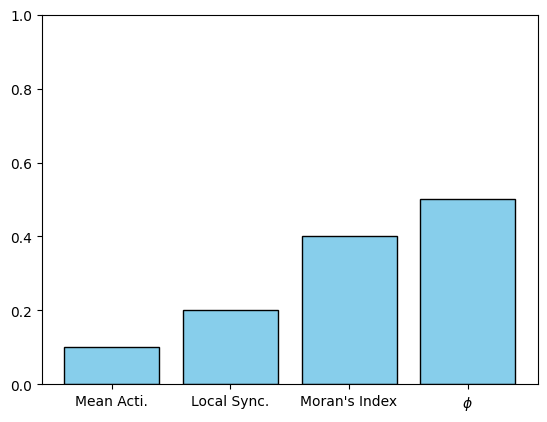

In [14]:
orderparmas_name = ['Mean Acti.', 'Local Sync.', "Moran's Index", '$\phi$']
orderparmas = [0.1, 0.2, 0.4, 0.5]
plt.ylim((0,1))
plt.bar(orderparmas_name, orderparmas, capsize=15, color='skyblue', edgecolor='black')